## WASTE CLASSIFICATION USING CNN MODEL

Processing category: dataset/TRAIN\O


100%|██████████| 12565/12565 [00:34<00:00, 367.41it/s]


Processing category: dataset/TRAIN\R


100%|██████████| 9999/9999 [00:22<00:00, 436.05it/s]


Number of images: 22564, Number of labels: 22564
DataFrame shape: (22564, 2)


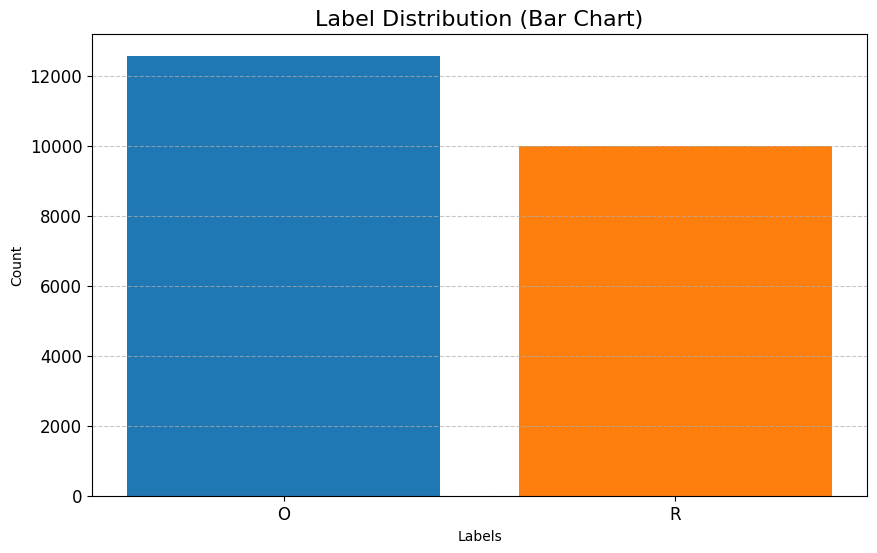

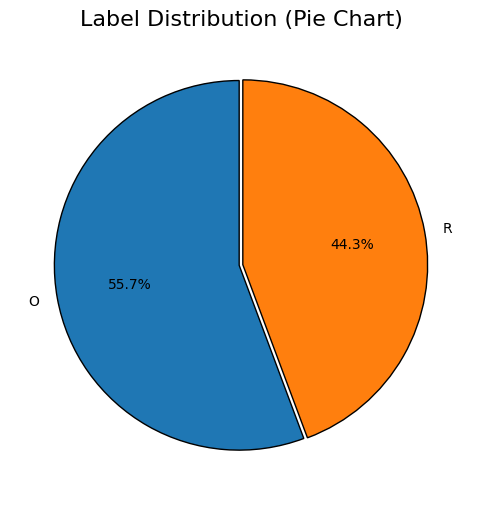

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
import os
warnings.filterwarnings('ignore')

test_path = "dataset/TEST"
train_path = "dataset/TRAIN"

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob


x_data = []
y_data = []


for category in glob(train_path + '/*'):
    print(f"Processing category: {category}")
    for file in tqdm(glob(category + '/*.jpg')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(os.path.basename(category))


if len(x_data) == 0 or len(y_data) == 0:
    print("No images or labels found. Please check your file paths.")
else:
    print(f"Number of images: {len(x_data)}, Number of labels: {len(y_data)}")


data = pd.DataFrame({'image': x_data, 'label': y_data})
print(f"DataFrame shape: {data.shape}")


label_counts = data.label.value_counts()

#  Bar Chart
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 
plt.bar(label_counts.index, label_counts.values, color=colors[:len(label_counts)])
plt.title('waste classification (Bar Chart)', fontsize=16)
plt.xlabel('Labels', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#  Pie Chart
plt.figure(figsize=(8, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Custom color palette for pie chart
plt.pie(label_counts, labels=label_counts.index, colors=colors[:len(label_counts)], autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black', 'linewidth': 1},explode=[0.01,0.01] )
plt.title('waste classification(Pie Chart)', fontsize=16)
plt.show()


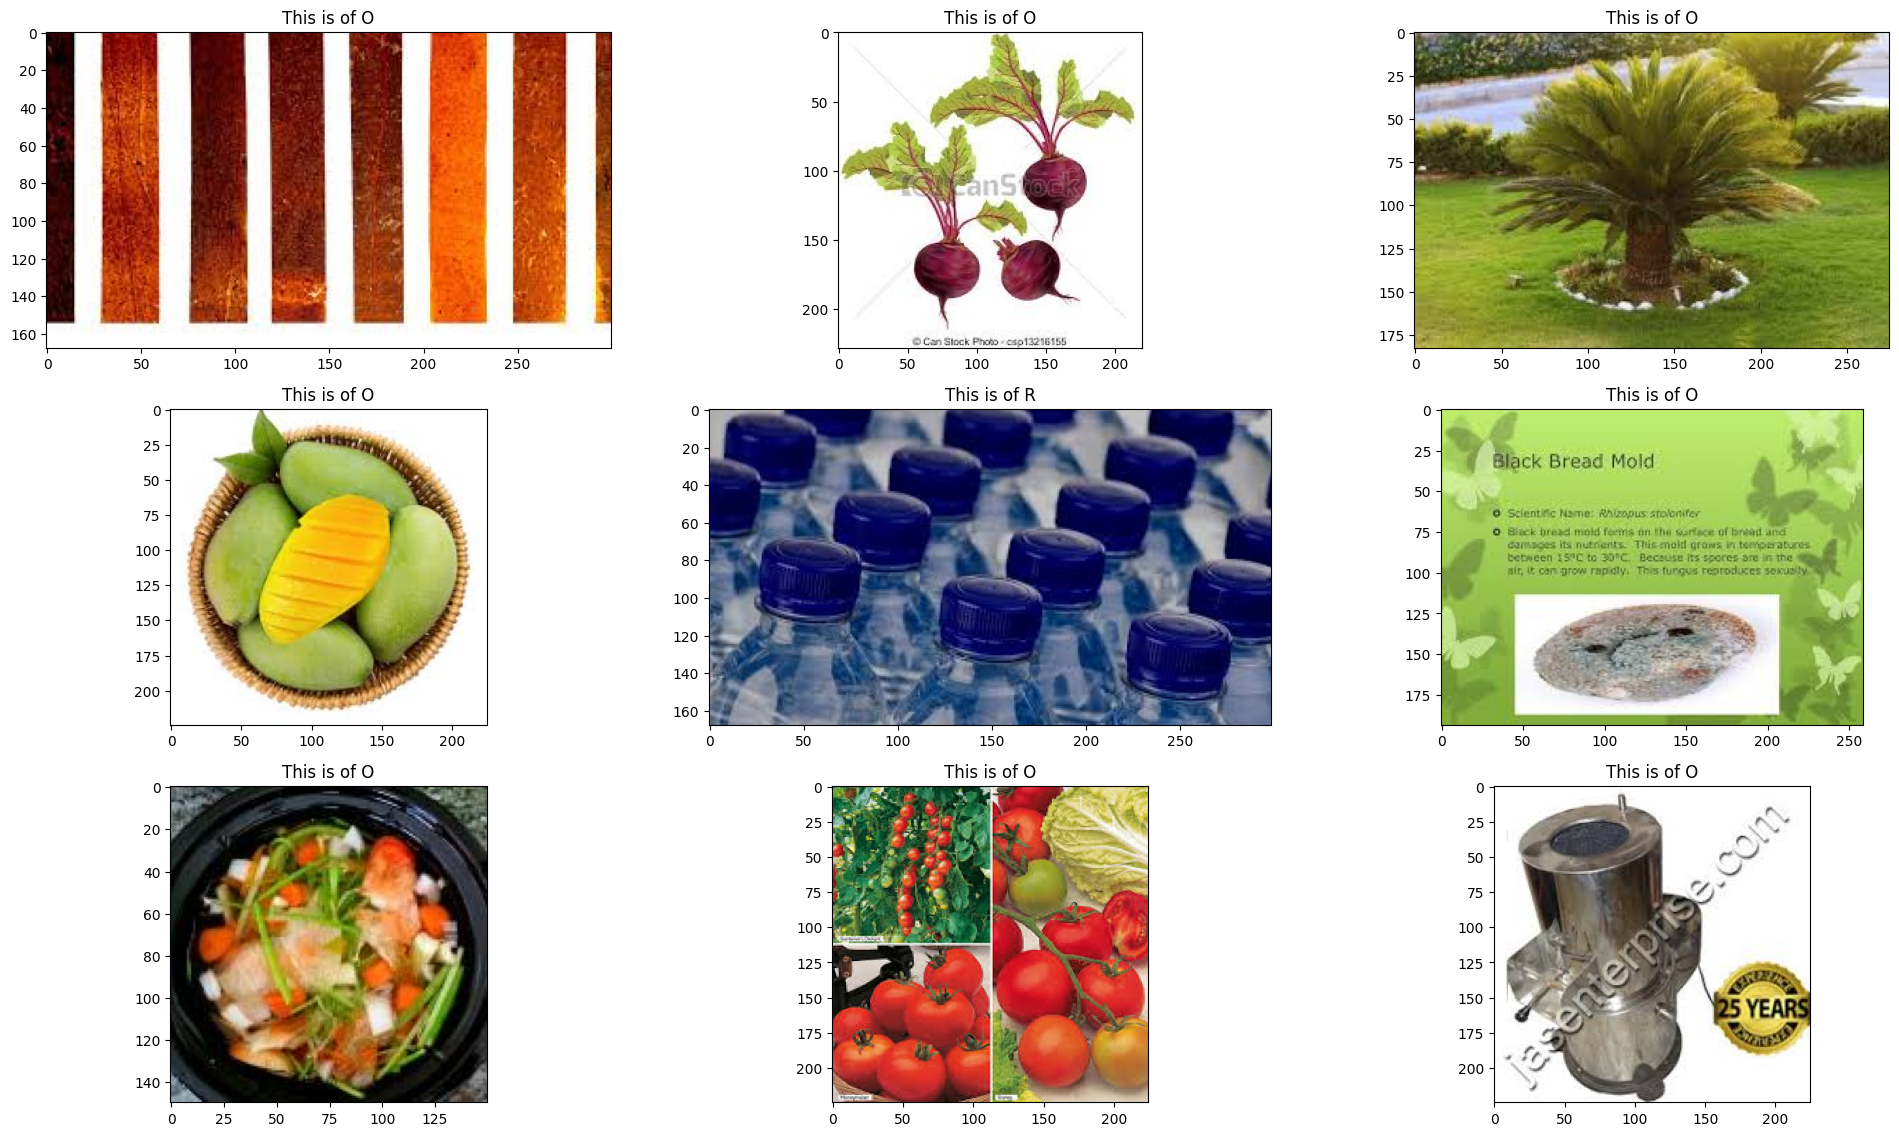

In [6]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index =np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN-Convoolutional Neural Network

In [30]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(loss = "binary_crossentropy",
              optimizer ="adam",
              metrics =["accuracy"])
batch_size = 256

In [31]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_21 (Activation)      │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_22 (Activation)      │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_23 (Activation)      │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_24 (Activation)      │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_25 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_26 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
train_datagen = ImageDataGenerator(rescale = 1./255)


In [33]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [34]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size =(224,224),
    batch_size= batch_size,
    color_mode ="rgb",
    class_mode ="categorical")
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size =(224,224),
    batch_size= batch_size,
    color_mode="rgb",
    class_mode="categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [35]:
hist = model.fit(
        train_generator ,
        epochs=10,
        validation_data=test_generator )

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 534s 6s/step - accuracy: 0.6984 - loss: 0.6750 - val_accuracy: 0.8544 - val_loss: 0.3765
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 410s 5s/step - accuracy: 0.8195 - loss: 0.4346 - val_accuracy: 0.8603 - val_loss: 0.3479
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 387s 4s/step - accuracy: 0.8380 - loss: 0.3840 - val_accuracy: 0.8842 - val_loss: 0.2963
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 397s 4s/step - accuracy: 0.8581 - loss: 0.3538 - val_accuracy: 0.8882 - val_loss: 0.2846
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 395s 4s/step - accuracy: 0.8712 - loss: 0.3222 - val_accuracy: 0.8667 - val_loss: 0.3247
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 388s 4s/step - accuracy: 0.8790 - loss: 0.2989 - val_accuracy: 0.8850 - val_loss: 0.2848
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 395s 4s/step - accuracy: 0.8946 - loss: 0.2715 - val_accuracy: 0.8930 - val_loss: 0.2831
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 483s 5s/step - accuracy: 0.9120 - loss: 0.2299 - val_accuracy: 0.8842 - v